What should the maximum angle be?  (in multiples of pi) 8

What should the minimum angle be? (in multiples of pi) 1

How many steps should the simulation take between the minimum and maximum angle? 100

How many measurements would you like the simulation to run through? 1000

What setup would you like to simulate? 1: H blocked, 2: V blocked, 3: Neither blocked 1

simulation of setup 1


Text(0.5, 1.0, 'Amount of photons existing in |+/-45> states')

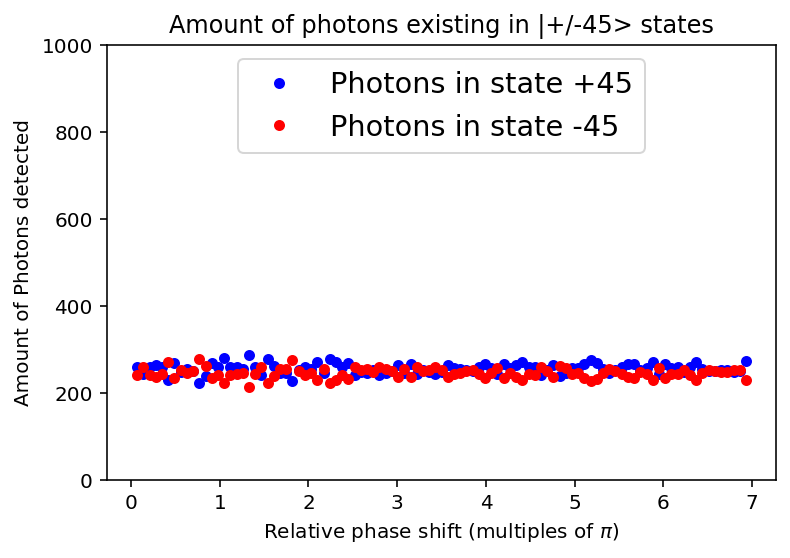

In [6]:
%matplotlib inline
import numpy as np
from numpy import *
from qutip import *
import matplotlib.pyplot as plt
from IPython.display import Image

#define matrices and vectors

H = basis(2,0)
V = basis(2,1)
p45 = 1/sqrt(2)*(H+V)
n45 = 1/sqrt(2)*(H-V)

phi1 = pi/4
PA_HV1 =  Qobj([[e**(1j*phi1),0],[0,1]])
PA_HV_hb = Qobj([[0,0],[0,1]])
PA_HV_vb= Qobj([[e**(1j*phi1),0],[0,0]])
theta=pi/4
halfwave = Qobj([[cos(2*theta), sin(2*theta)],[sin(2*theta), -cos(2*theta)]])
θ1 = pi/4
Pp45 = Qobj([[cos(θ1)**2,cos(θ1)*sin(θ1)], [cos(θ1)*sin(θ1),sin(θ1)**2]])
θ2 = -pi/4
Pn45 = Qobj([[cos(θ2)**2,cos(θ2)*sin(θ2)], [cos(θ2)*sin(θ2),sin(θ2)**2]])
def PA_45_meas(vector):
    p45_comp = Pp45*vector
    n45_comp = Pn45*vector
    pp45 = abs(p45_comp.norm()**2)
    pn45 = abs(n45_comp.norm()**2)
    return pp45, pn45

def EffM(phi,vector):
    PA_HV2 = Qobj([[1,0],[0,e**(1j*phi)]])
    EffM = PA_HV2*IntM
    vector_out = EffM*vector
    return vector_out

# determine parameters of simulation
psi0 = p45
# get some parameters from input, need to be converted from string
phi_max, phi_min = input("What should the maximum angle be?  (in multiples of pi)"), input("What should the minimum angle be? (in multiples of pi)")
phi_max, phi_min = float(phi_max), float(phi_min)
n = input("How many steps should the simulation take between the minimum and maximum angle?")
n = int(n)
step = float((phi_max-phi_min)/n)
N_init = input("How many measurements would you like the simulation to run through?")
N_init = int(N_init)
setup = input("What setup would you like to simulate? 1: H blocked, 2: V blocked, 3: Neither blocked")
setup = int(setup)
if setup == 1:
    IntM = halfwave*PA_HV_hb
    print("simulation of setup 1")
elif setup == 2:
    IntM = halfwave*PA_HV_vb
    print("Simulation of setup 2")
elif setup == 3:
    IntM = halfwave*PA_HV1
    print("Simulation of setup 3")
else:
    print("This setup is not defined")

output_p45=0
output_n45=0
angles = list()
p45_meas = list()
n45_meas = list()
for i in range(round(phi_min), n):
    phi2 = pi/4+(i*pi*step)
    psi_out = EffM(phi2, psi0)
    angles.append((phi2-phi1)/pi)

    prob_p45 = round(float(PA_45_meas(psi_out)[0]),5)
    prob_n45 = round(float(PA_45_meas(psi_out)[1]),5)
    if (prob_p45 + prob_n45) == 1:
        N=N_init
    else:
        N = int(N_init/2)

    for j in range(N):
        a = random.randint(1,(prob_p45+prob_n45)*100)
        if a <= prob_p45*100:
            output_p45 = output_p45+1
        else:
            output_n45 = output_n45+1

    p45_meas.append(output_p45)
    n45_meas.append(output_n45)
    output_p45=0
    output_n45=0

plt.plot(angles, p45_meas, 'b.', markersize = 9, label='Photons in state +45')
plt.plot(angles, n45_meas, 'r.', markersize = 9, label='Photons in state -45')
legend=plt.legend(loc='upper center', fontsize='x-large')
plt.ylim(0, N+500)

plt.xlabel('Relative phase shift (multiples of $\pi$)')
plt.ylabel('Amount of Photons detected')
plt.title('Amount of photons existing in |+/-45> states')